In [1]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the datasets
drivers = pd.read_csv('../data/drivers.csv')
driver_standings = pd.read_csv('../data/driver_standings.csv')
races = pd.read_csv('../data/races.csv')

In [2]:
drivers.head()

,driverId,driverRef,number,code,forename,surname,dob,nationality,url
0,1,hamilton,44,HAM,Lewis,Hamilton,1985-01-07,British,http://en.wikipedia.org/wiki/Lewis_Hamilton
1,2,heidfeld,\N,HEI,Nick,Heidfeld,1977-05-10,German,http://en.wikipedia.org/wiki/Nick_Heidfeld
2,3,rosberg,6,ROS,Nico,Rosberg,1985-06-27,German,http://en.wikipedia.org/wiki/Nico_Rosberg
3,4,alonso,14,ALO,Fernando,Alonso,1981-07-29,Spanish,http://en.wikipedia.org/wiki/Fernando_Alonso
4,5,kovalainen,\N,KOV,Heikki,Kovalainen,1981-10-19,Finnish,http://en.wikipedia.org/wiki/Heikki_Kovalainen


In [3]:
driver_standings.head()

,driverStandingsId,raceId,driverId,points,position,positionText,wins
0,1,18,1,10.0,1,1,1
1,2,18,2,8.0,2,2,0
2,3,18,3,6.0,3,3,0
3,4,18,4,5.0,4,4,0
4,5,18,5,4.0,5,5,0


In [4]:
races.head()

,raceId,year,round,circuitId,name,date,time,url,fp1_date,fp1_time,fp2_date,fp2_time,fp3_date,fp3_time,quali_date,quali_time,sprint_date,sprint_time
0,1,2009,1,1,Australian Grand Prix,2009-03-29,06:00:00,http://en.wikipedia.org/wiki/2009_Australian_G...,\N,\N,\N,\N,\N,\N,\N,\N,\N,\N
1,2,2009,2,2,Malaysian Grand Prix,2009-04-05,09:00:00,http://en.wikipedia.org/wiki/2009_Malaysian_Gr...,\N,\N,\N,\N,\N,\N,\N,\N,\N,\N
2,3,2009,3,17,Chinese Grand Prix,2009-04-19,07:00:00,http://en.wikipedia.org/wiki/2009_Chinese_Gran...,\N,\N,\N,\N,\N,\N,\N,\N,\N,\N
3,4,2009,4,3,Bahrain Grand Prix,2009-04-26,12:00:00,http://en.wikipedia.org/wiki/2009_Bahrain_Gran...,\N,\N,\N,\N,\N,\N,\N,\N,\N,\N
4,5,2009,5,4,Spanish Grand Prix,2009-05-10,12:00:00,http://en.wikipedia.org/wiki/2009_Spanish_Gran...,\N,\N,\N,\N,\N,\N,\N,\N,\N,\N


In [5]:
merged_data = pd.merge(drivers, driver_standings, on='driverId')
merged_merged_data = pd.merge(merged_data, races, on='raceId')
merged_merged_data.head()

,driverId,driverRef,number,code,forename,surname,dob,nationality,url_x,driverStandingsId,...,fp1_date,fp1_time,fp2_date,fp2_time,fp3_date,fp3_time,quali_date,quali_time,sprint_date,sprint_time
0,1,hamilton,44,HAM,Lewis,Hamilton,1985-01-07,British,http://en.wikipedia.org/wiki/Lewis_Hamilton,1,...,\N,\N,\N,\N,\N,\N,\N,\N,\N,\N
1,2,heidfeld,\N,HEI,Nick,Heidfeld,1977-05-10,German,http://en.wikipedia.org/wiki/Nick_Heidfeld,2,...,\N,\N,\N,\N,\N,\N,\N,\N,\N,\N
2,3,rosberg,6,ROS,Nico,Rosberg,1985-06-27,German,http://en.wikipedia.org/wiki/Nico_Rosberg,3,...,\N,\N,\N,\N,\N,\N,\N,\N,\N,\N
3,4,alonso,14,ALO,Fernando,Alonso,1981-07-29,Spanish,http://en.wikipedia.org/wiki/Fernando_Alonso,4,...,\N,\N,\N,\N,\N,\N,\N,\N,\N,\N
4,5,kovalainen,\N,KOV,Heikki,Kovalainen,1981-10-19,Finnish,http://en.wikipedia.org/wiki/Heikki_Kovalainen,5,...,\N,\N,\N,\N,\N,\N,\N,\N,\N,\N


In [8]:
# group by year and natipnality
f1_seasons_nationalities = merged_merged_data.groupby('year')['nationality'].value_counts()
f1_seasons_nationalities


year  nationality
1950  American       176
      British         83
      French          56
      Italian         45
      Argentine       19
                    ... 
2023  German           1
      Japanese         1
      Mexican          1
      Monegasque       1
      Thai             1
Name: nationality, Length: 1030, dtype: int64

In [9]:
# calculate the percentage of each nationality in each year
f1_seasons_nationalities = f1_seasons_nationalities.groupby(level=0).apply(lambda x: 100 * x / float(x.sum()))
f1_seasons_nationalities

year  nationality
1950  American       42.004773
      British        19.809069
      French         13.365155
      Italian        10.739857
      Argentine       4.534606
                       ...    
2023  German          5.000000
      Japanese        5.000000
      Mexican         5.000000
      Monegasque      5.000000
      Thai            5.000000
Name: nationality, Length: 1030, dtype: float64

array([<AxesSubplot:ylabel='American'>,
       <AxesSubplot:ylabel='American-Italian'>,
       <AxesSubplot:ylabel='Argentine'>,
       <AxesSubplot:ylabel='Argentine-Italian'>,
       <AxesSubplot:ylabel='Australian'>, <AxesSubplot:ylabel='Austrian'>,
       <AxesSubplot:ylabel='Belgian'>, <AxesSubplot:ylabel='Brazilian'>,
       <AxesSubplot:ylabel='British'>, <AxesSubplot:ylabel='Canadian'>,
       <AxesSubplot:ylabel='Chilean'>, <AxesSubplot:ylabel='Chinese'>,
       <AxesSubplot:ylabel='Colombian'>, <AxesSubplot:ylabel='Czech'>,
       <AxesSubplot:ylabel='Danish'>, <AxesSubplot:ylabel='Dutch'>,
       <AxesSubplot:ylabel='East German'>, <AxesSubplot:ylabel='Finnish'>,
       <AxesSubplot:ylabel='French'>, <AxesSubplot:ylabel='German'>,
       <AxesSubplot:ylabel='Hungarian'>, <AxesSubplot:ylabel='Indian'>,
       <AxesSubplot:ylabel='Indonesian'>, <AxesSubplot:ylabel='Irish'>,
       <AxesSubplot:ylabel='Italian'>, <AxesSubplot:ylabel='Japanese'>,
       <AxesSubplot:ylabel='Liec

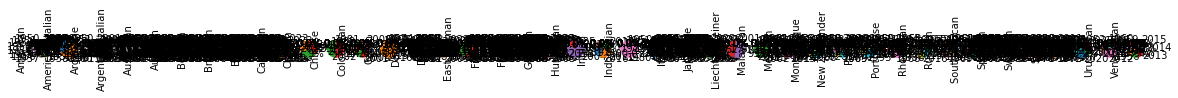

In [10]:
# pie chart
f1_seasons_nationalities.unstack().plot(kind='pie', subplots=True, figsize=(20, 20), autopct='%1.1f%%', startangle=90, legend=False)

